# Activation functions

On this notebook we will take a look at some of the different activation functions present in keras backend and will compare them.

## The data
We will use our old friend MNIST for its simplicity. 

<font color=red><b>Load the dataset and preprocess it. 
</font>

In [1]:
import os, time
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])



y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

## Model Architecture
Let's build a very simple model on this example. It will consist on:
- A dense layer with 512 units, relu activated
- A dense layer with the number of classes as  the amount of units, softmax activated
- Use RMSprop as the optimizer and categorical crossentropy as the loss function. Add accuracy to the metrics

<font color=red><b> Build the model
</font>

In [3]:
num_classes = 10
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


<font color=red><b> Train the model for 5 epochs and with a batch size of 128. Use the test data as validation and evaluate the model. Keep the information in a history variable
</font>

In [4]:
batch_size = 128
epochs = 5
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2519 - accuracy: 0.9278 - val_loss: 0.1242 - val_accuracy: 0.9628
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1030 - accuracy: 0.9696 - val_loss: 0.0868 - val_accuracy: 0.9733
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0674 - accuracy: 0.9801 - val_loss: 0.0766 - val_accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.0679 - val_accuracy: 0.9781
Test loss: 0.068
Test accuracy: 0.978


Let's now plot the loss for both using matplotlib. Is it nice?

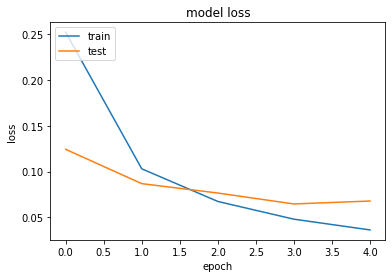

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using all activations
Now let's run the model with all the activations in the list and view the results in tensorboard


<font color=red><b> Let's do precisely that!
    <br> Hint: remember to add the tensorboard as a callback for the training.
    <br> Hint2: use the function os.path.join to include the activation name on each model call
    
</font>

In [6]:
from tensorflow.keras.callbacks import TensorBoard
epochs = 20
log_path = '/home/fer/data/formaciones/afi/tensorboard_log/activations_experiment'
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    # build and compile the model
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    tensorboard = TensorBoard(os.path.join(log_path,f'{activation}_{time.time()}'))
    # fit the model, adding the tensorboard to the callbacks
    model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3829 - accuracy: 0.8892 - val_loss: 0.3109 - val_accuracy: 0.9133
Epoch 2/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3096 - accuracy: 0.9135 - val_loss: 0.3138 - val_accuracy: 0.9119
Epoch 3/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2955 - accuracy: 0.9178 - val_loss: 0.3409 - val_accuracy: 0.9092
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2873 - accuracy: 0.9209 - val_loss: 0.2985 - val_accuracy: 0.9198
Epoch 5/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2843 - accuracy: 0.9200 - val_loss: 0.2848 - val_accuracy: 0.9216
Epoch 6/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2787 - accuracy: 0.9218 - val_loss: 0.2889 - val_accuracy: 0.9201
Epoch 7/20
60000/60000 [==============================] 

Epoch 15/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.0625 - val_accuracy: 0.9828
Epoch 16/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0666 - val_accuracy: 0.9828
Epoch 17/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0633 - val_accuracy: 0.9838
Epoch 18/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0728 - val_accuracy: 0.9813
Epoch 19/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0934 - val_accuracy: 0.9762
Epoch 20/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0723 - val_accuracy: 0.9830
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==========================